<a href="https://colab.research.google.com/github/NISHTHA0305/ML_Model/blob/main/LSTM1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from google.colab import files
uploaded = files.upload()
df = pd.read_excel('Weather Data 2014-11-30.xlsx')
weather_data = pd.read_excel("Weather Data 2014-11-30.xlsx", sheet_name="Weather Data")

weather_data = weather_data.dropna(subset=["Date", "Time"]).reset_index(drop=True)

columns_to_fix = ["TempOut","OutHum","DewPt","WindSpeed","SolarEnergy","ArcInt"]
weather_data[columns_to_fix] = weather_data[columns_to_fix].replace('---', np.nan)

for col in columns_to_fix:
    weather_data[col] = pd.to_numeric(weather_data[col], errors='coerce')

weather_data.dropna(subset=columns_to_fix, inplace=True)

weather_data["Datetime"]=pd.to_datetime(weather_data["Date"].astype(str) + " "+ weather_data["Time"].astype(str))
weather_data["Hour"]=weather_data["Datetime"].dt.hour
weather_data["Day"]=weather_data["Datetime"].dt.day
weather_data["Month"]=weather_data["Datetime"].dt.month

scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(weather_data[["TempOut","OutHum","DewPt","WindSpeed","SolarEnergy","ArcInt"]])
window_size = 48
X = []
y = []
target_dates = weather_data.index[window_size:]

for i in range(window_size, len(scaled_data)):
    X.append(scaled_data[i - window_size:i, 0])
    y.append(scaled_data[i, 5])

X = np.array(X)
y = np.array(y)
X = X.reshape((X.shape[0], X.shape[1], 6))

X_train, X_test, y_train, y_test, dates_train, dates_test = train_test_split(
    X, y, target_dates, test_size=0.2, shuffle=False
)

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
target_scaler = MinMaxScaler()
scaled_target = target_scaler.fit_transform(weather_data[['ArcInt']].astype(float))

model = Sequential()
model.add(LSTM(units=128, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=128))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train, y_train,epochs=100,batch_size=128, validation_split=0.1)

predictions = model.predict(X_test)
predictions = target_scaler.inverse_transform(predictions).flatten()
y_test = target_scaler.inverse_transform(y_test.reshape(-1,1)).flatten()

rmse = np.sqrt(np.mean((y_test - predictions)**2))
print(f'RMSE: {rmse:.2f}')

Saving Weather Data 2014-11-30.xlsx to Weather Data 2014-11-30 (3).xlsx


<ipython-input-4-24969d60f548>:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  weather_data[columns_to_fix] = weather_data[columns_to_fix].replace('---', np.nan)


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


382/382 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 0.0111 - val_loss: 0.0016
Epoch 2/100
382/382 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0013 - val_loss: 3.7560e-04
Epoch 3/100
382/382 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 8.6141e-04 - val_loss: 3.7471e-04
Epoch 4/100
382/382 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 7.1498e-04 - val_loss: 3.4715e-04
Epoch 5/100
382/382 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 6.6000e-04 - val_loss: 2.1492e-04
Epoch 6/100
382/382 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 5.5552e-04 - val_loss: 1.9814e-04
Epoch 7/100
382/382 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 4.8704e-04 - val_loss: 1.8167e-04
Epoch 8/100
382/382 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 4.4486e-04 - val_loss: 3.4307e-04
Epoch 9/100
382/382 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 4.3408e-04 - val_loss: 1.7818e-04
Epoch 10/100
382/382 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 3.7337e-04 - val_loss: 3.1288e-04
Epoch 11/100
382/382 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 

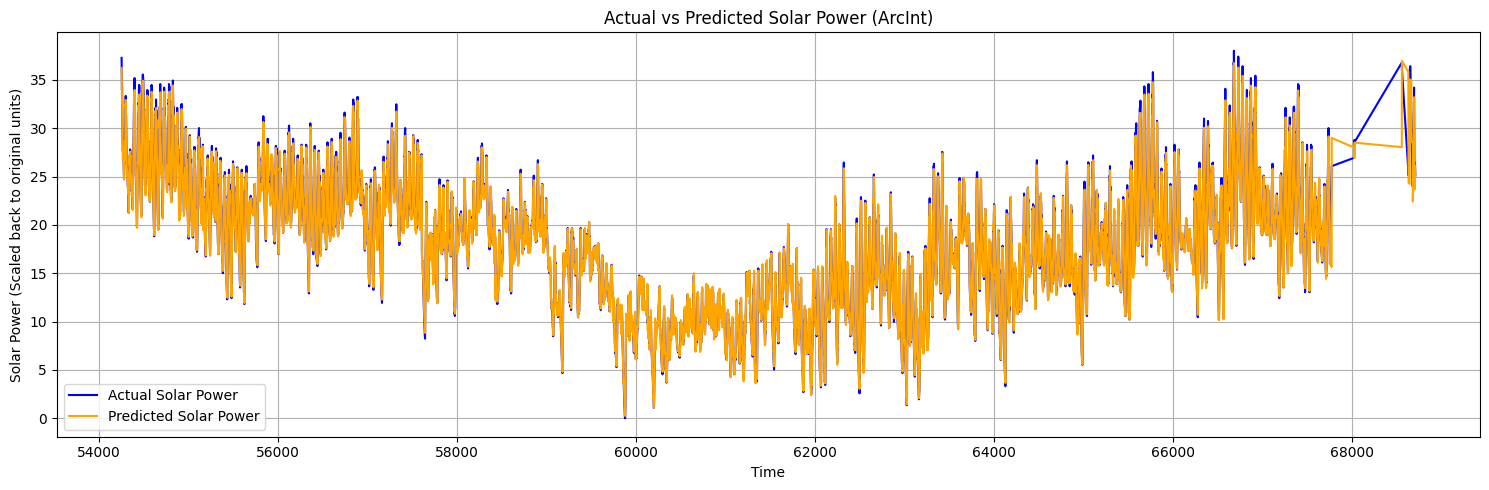

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
plt.plot(dates_test, y_test, label='Actual Solar Power', color='blue')
plt.plot(dates_test, predictions, label='Predicted Solar Power', color='orange')
plt.title('Actual vs Predicted Solar Power (ArcInt)')
plt.xlabel('Time')
plt.ylabel('Solar Power (Scaled back to original units)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
